# Fry's Seven Stages of Visualization

**Stages**
1. Acquire
2. Parse
3. Filter
4. Mine
5. Represent
6. Refine
7. Interact

In [44]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import ipywidgets as widgets

In [45]:
'''
Stage 1: Acquire data from a dataset from any source like kaggle.
Ex: https://www.kaggle.com/datasets/shekharkoirala/nepal-covid19-dataset
'''
file_path="../data/nepal-covid.csv"
covid_dataframe = pd.read_csv(file_path)
covid_dataframe

,Province,District,Sex,Age,Period,Value
0,Bagmati,306 KATHMANDU,Male,31 - 40,2020-01-23,1
1,Gandaki,411 BAGLUNG,Female,11 - 20,2020-03-28,1
2,Sudurpaschim,708 KAILALI,Male,31 - 40,2020-03-27,1
3,Bagmati,306 KATHMANDU,Female,11 - 20,2020-03-22,1
4,Bagmati,304 DHADING,Male,31 - 40,2020-03-25,1
...,...,...,...,...,...,...
121150,Sudurpaschim,708 KAILALI,Female,11 - 20,2021-07-16,1
121151,Province 2,202 SIRAHA,Male,80+,2021-06-24,1
121152,Bagmati,312 MAKWANPUR,Female,61 - 70,2021-06-25,2
121153,Bagmati,305 NUWAKOT,Female,41 - 50,2021-07-09,2


In [46]:
'''
Stage 2: Parse data from the dataset
'''
# Preview the data
display(covid_dataframe.info())
display(covid_dataframe.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Province  121155 non-null  object
 1   District  121155 non-null  object
 2   Sex       121155 non-null  object
 3   Age       119635 non-null  object
 4   Period    121155 non-null  object
 5   Value     121155 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.5+ MB


None

,Province,District,Sex,Age,Period,Value
0,Bagmati,306 KATHMANDU,Male,31 - 40,2020-01-23,1
1,Gandaki,411 BAGLUNG,Female,11 - 20,2020-03-28,1
2,Sudurpaschim,708 KAILALI,Male,31 - 40,2020-03-27,1
3,Bagmati,306 KATHMANDU,Female,11 - 20,2020-03-22,1
4,Bagmati,304 DHADING,Male,31 - 40,2020-03-25,1


The Age column contains age ranges (like '31 - 40') and an '80+' category, so it's stored as an object.

To convert this to a numeric format, we can:

Take the midpoint of each age range (e.g., '31 - 40' → 35.5)

Convert '80+' to a reasonable estimate like 85

In [47]:
def parse_age(age_str):
    if isinstance(age_str, str):
        if '+' in age_str:
            return 85  # Approx for '80+'
        try:
            parts = age_str.split(' - ')
            return (int(parts[0]) + int(parts[1])) / 2
        except:
            return None
    return None  # Return None for non-string entries

covid_dataframe["Age_numeric"] = covid_dataframe["Age"].apply(parse_age)

covid_dataframe

,Province,District,Sex,Age,Period,Value,Age_numeric
0,Bagmati,306 KATHMANDU,Male,31 - 40,2020-01-23,1,35.5
1,Gandaki,411 BAGLUNG,Female,11 - 20,2020-03-28,1,15.5
2,Sudurpaschim,708 KAILALI,Male,31 - 40,2020-03-27,1,35.5
3,Bagmati,306 KATHMANDU,Female,11 - 20,2020-03-22,1,15.5
4,Bagmati,304 DHADING,Male,31 - 40,2020-03-25,1,35.5
...,...,...,...,...,...,...,...
121150,Sudurpaschim,708 KAILALI,Female,11 - 20,2021-07-16,1,15.5
121151,Province 2,202 SIRAHA,Male,80+,2021-06-24,1,85.0
121152,Bagmati,312 MAKWANPUR,Female,61 - 70,2021-06-25,2,65.5
121153,Bagmati,305 NUWAKOT,Female,41 - 50,2021-07-09,2,45.5


We now have a age numeric column after parsing data

In [48]:
'''
Stage 3: Filter
Remove all those rows that has missing test or case values
'''
print("Rows with missing/null values")
display(covid_dataframe[covid_dataframe[['Value', 'Age']].isnull().any(axis=1)])


Rows with missing/null values


,Province,District,Sex,Age,Period,Value,Age_numeric
7037,Province 2,207 BARA,Male,NaN,2020-08-11,1,NaN
7223,Province 2,204 MAHOTTARI,Male,NaN,2020-08-26,1,NaN
7355,Sudurpaschim,704 BAITADI,Female,NaN,2020-08-23,1,NaN
7444,Province 1,111 JHAPA,Male,NaN,2020-08-25,1,NaN
7485,Province 1,112 MORANG,Male,NaN,2020-08-22,1,NaN
...,...,...,...,...,...,...,...
120510,Province 1,111 JHAPA,Female,NaN,2021-07-11,1,NaN
120592,Bagmati,309 KAVREPALANCHOK,Female,NaN,2021-07-03,1,NaN
120881,Province 1,113 SUNSARI,Male,NaN,2021-06-30,1,NaN
121015,Bagmati,306 KATHMANDU,Male,NaN,2021-07-13,2,NaN


We see there are some rows with NaN values. We will need to drop (remove) them before we proceed

In [49]:
covid_dataframe_filtered = covid_dataframe.dropna(subset=["Value", "Age"])
display(covid_dataframe_filtered[covid_dataframe_filtered[["Value", "Age"]].isnull().any(axis=1)])

,Province,District,Sex,Age,Period,Value,Age_numeric


Now there are no rows with NaN values

In [50]:
'''
State 4: Mine
We can now extract information from the data
'''
# Convert 'Period' to datetime to 
covid_dataframe_filtered.loc[:, "Period"] = pd.to_datetime(covid_dataframe_filtered["Period"])

# Total cases by province
cases_by_province = covid_dataframe_filtered.groupby("Province")["Value"].sum().sort_values(ascending=False)

# Case trends over time
cases_over_time = covid_dataframe_filtered.groupby("Period")["Value"].sum()

# Case distribution by age
age_group_cases = covid_dataframe_filtered.groupby("Age")["Value"].sum().sort_values(ascending=False)

# Case distribution by gender
gender_cases = covid_dataframe_filtered.groupby("Sex")["Value"].sum()

print("cases_by_province\n", cases_by_province, "\n")
print("gender_cases\n", gender_cases, "\n")
print("cases_over_time\n", cases_over_time, "\n")
print("age_group_cases\n", age_group_cases, "\n")


cases_by_province
 Province
Bagmati         348262
Lumbini          91192
Province 1       80879
Gandaki          59679
Province 2       45032
Sudurpaschim     37199
Karnali          20223
Name: Value, dtype: int64 

gender_cases
 Sex
Female    269791
Male      412675
Name: Value, dtype: int64 

cases_over_time
 Period
2020-01-23       1
2020-03-22       1
2020-03-25       1
2020-03-27       1
2020-03-28       1
              ... 
2021-07-13    1635
2021-07-14    2008
2021-07-15    1779
2021-07-16    2006
2021-07-17    1306
Name: Value, Length: 458, dtype: int64 

age_group_cases
 Age
31 - 40    169334
21 - 30    166282
41 - 50    117796
51 - 60     85011
61 - 70     47392
11 - 20     47181
71 - 80     23434
0 - 10      16368
80+          9668
Name: Value, dtype: int64 



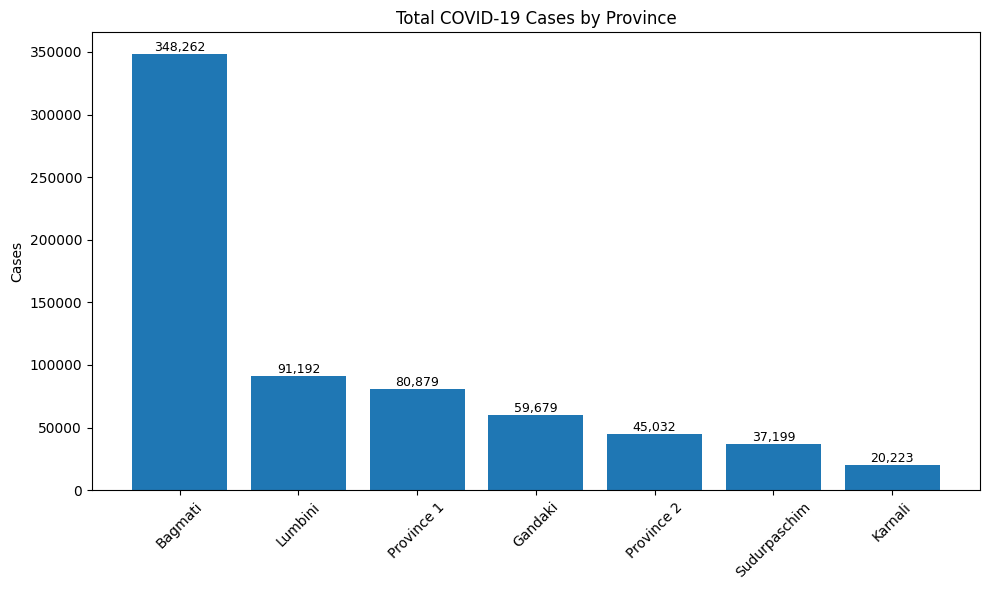

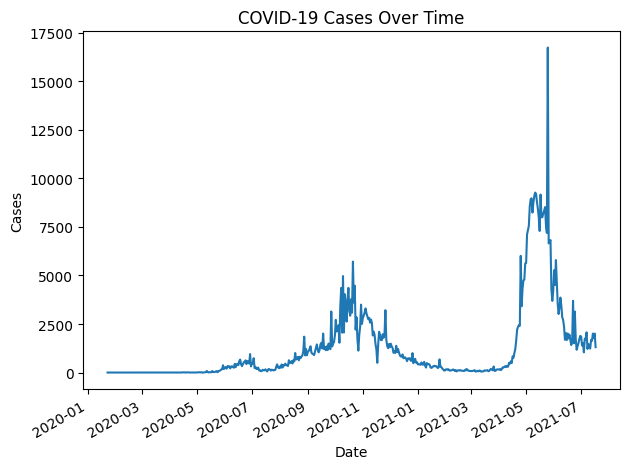

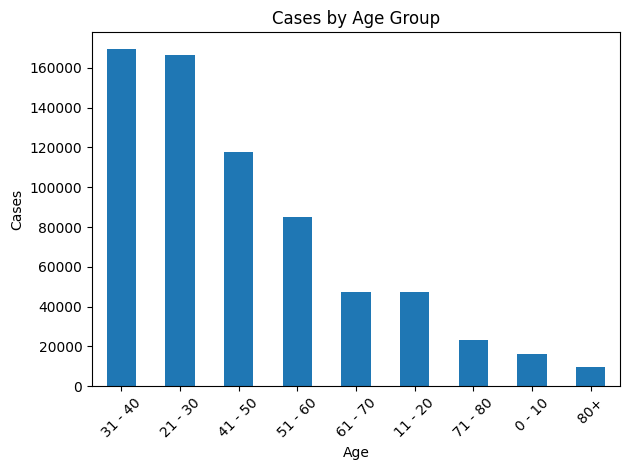

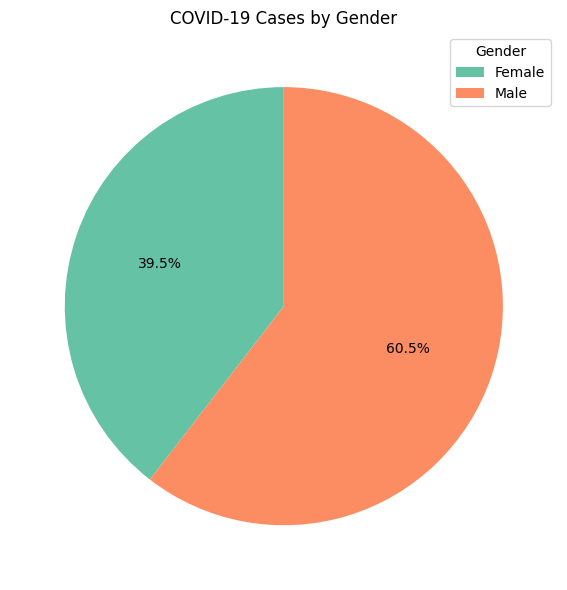

In [51]:

'''
State 5 and 6: Represent and refine
5: We will create multiple visualizations based on the data we mined to better visualize the results
6. We will provide proper labels, colors and markings to better understand data after looking at the visualization
'''

# Bar chart: Cases by Province
# Bar chart: Total cases by province with actual values above bars
plt.figure(figsize=(10, 6))
bars = plt.bar(cases_by_province.index, cases_by_province.values)
plt.title("Total COVID-19 Cases by Province")
plt.ylabel("Cases")
plt.xticks(rotation=45)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Line chart: Cases over time
cases_over_time.plot(title="COVID-19 Cases Over Time")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


# Bar chart: Cases by Age Group
age_group_cases.plot(kind="bar", title="Cases by Age Group")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a pie chart with a legend instead of labels on the slices
plt.figure(figsize=(6, 6))
colors = plt.get_cmap("Set2").colors  # use a pleasant color palette

# Pie chart without labels on the pie
patches, texts, _ = plt.pie(gender_cases, labels=None, autopct='%1.1f%%', colors=colors, startangle=90)

# Add a legend instead
plt.legend(patches, gender_cases.index, title="Gender", loc="best")
plt.title("COVID-19 Cases by Gender")
plt.tight_layout()
plt.show()

In [52]:
'''
State 7: Interact
We will create an interactive select dropdown that will filter based on the province
'''
import ipywidgets as widgets
from IPython.display import display

# Dropdown for province selection
province_dropdown = widgets.Dropdown(
    options=covid_dataframe_filtered["Province"].unique(),
    description="Province:"
)

# Function to show hospital/case details per selected province
def show_province_data(province):
    display(covid_dataframe_filtered[covid_dataframe_filtered["Province"] == province].head())

# Interactive widget
widgets.interact(show_province_data, province=province_dropdown)

interactive(children=(Dropdown(description='Province:', options=('Bagmati', 'Gandaki', 'Sudurpaschim', 'Provin…

<function __main__.show_province_data(province)>